In [ ]:
import torch

Introduction:

Why Is our model important:

Helps catch eye disease early, especially in remote areas without specialists, so patients can get timely treatment and avoid serious problems like blindness. This is why it matters part!

Our Research question: How accurately can a convolutional neural network classify multiple eye diseases using retinal images

Applied key deep learning techniques within a CNN framework to improve prediction precision in multi-class eye disease classification, including data balancing with oversampling, image preprocessing, and a CNN architecture using multiple convolutional layers to learn complext patterns.

We include what are the types of Retinal Eye images
*In my code there is examples of the eye images*

Define what each of the diseases mean. One bulletpoint for each no need to make it long

*Do a Data Overview slide*




One cool thing With PyTorch, you can load datasets directly into your code without needing to manually download CSV files

In [ ]:
!pip install kagglehub

import kagglehub
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("ruhulaminsharif/eye-disease-image-dataset")

print("Dataset path:", path)

# Display structure
for root, dirs, files in os.walk(path):
    print("Directory:", root)
    print("Sub-directories:", dirs)
    print("Files:", files)
    print("-" * 50)


Dataset path: /kaggle/input/eye-disease-image-dataset
Directory: /kaggle/input/eye-disease-image-dataset
Sub-directories: ['Original Dataset', 'Augmented Dataset']
Files: []
--------------------------------------------------
Directory: /kaggle/input/eye-disease-image-dataset/Original Dataset
Sub-directories: ['Original Dataset']
Files: []
--------------------------------------------------
Directory: /kaggle/input/eye-disease-image-dataset/Original Dataset/Original Dataset
Sub-directories: ['Macular Scar', 'Pterygium', 'Disc Edema', 'Glaucoma', 'Healthy', 'Retinal Detachment', 'Central Serous Chorioretinopathy-Color Fundus', 'Retinitis Pigmentosa', 'Myopia', 'Diabetic Retinopathy']
Files: []
--------------------------------------------------
Directory: /kaggle/input/eye-disease-image-dataset/Original Dataset/Original Dataset/Macular Scar
Sub-directories: []
Files: ['Macular Scar333.jpg', 'Macular Scar119.jpg', 'Macular Scar417.jpg', 'Macular Scar73.jpg', 'Macular Scar308.jpg', 'Macular 

This is just importing the libraries not that important


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os


Data Preprocessing- Creating a Dataframe from images ( This is the Title)

We loop through every folder in the dataset and for each image, we record:

Where the image is located (its full file path)

What the image represents (the label, taken from the folder name)

All of this information is then stored in a Pandas DataFrame, which acts like a table.
This helps the model understand what each image is and where to find it during training. *simplify this*

In [ ]:
import os
import pandas as pd

dataset_dir = os.path.join(path, "Augmented Dataset")

images = []
labels = []

for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2 = os.path.join(subfolder_path, folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)

df = pd.DataFrame({'image': images, 'label': labels})
#show the dataframe
df

,image,label
0,/kaggle/input/eye-disease-image-dataset/Augmen...,Macular Scar
1,/kaggle/input/eye-disease-image-dataset/Augmen...,Macular Scar
2,/kaggle/input/eye-disease-image-dataset/Augmen...,Macular Scar
3,/kaggle/input/eye-disease-image-dataset/Augmen...,Macular Scar
4,/kaggle/input/eye-disease-image-dataset/Augmen...,Macular Scar
...,...,...
16237,/kaggle/input/eye-disease-image-dataset/Augmen...,Diabetic Retinopathy
16238,/kaggle/input/eye-disease-image-dataset/Augmen...,Diabetic Retinopathy
16239,/kaggle/input/eye-disease-image-dataset/Augmen...,Diabetic Retinopathy
16240,/kaggle/input/eye-disease-image-dataset/Augmen...,Diabetic Retinopathy


In [ ]:
#Just checking to see how many images we have
df['label'].value_counts()

,count
label,
Diabetic Retinopathy,3444
Glaucoma,2880
Healthy,2676
Myopia,2251
Macular Scar,1937
Retinitis Pigmentosa,834
Disc Edema,762
Retinal Detachment,750
Central Serous Chorioretinopathy-Color Fundus,606


We can't work directly without labels, so we do label_encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Encoded classes:", le.classes_)

Encoded classes: ['Central Serous Chorioretinopathy-Color Fundus' 'Diabetic Retinopathy'
 'Disc Edema' 'Glaucoma' 'Healthy' 'Macular Scar' 'Myopia' 'Pterygium'
 'Retinal Detachment' 'Retinitis Pigmentosa']


This is how we defined the label encoding for each eye disease

In [ ]:
pd.DataFrame({'label': le.classes_, 'label_encoded': le.transform(le.classes_)})


,label,label_encoded
0,Central Serous Chorioretinopathy-Color Fundus,0
1,Diabetic Retinopathy,1
2,Disc Edema,2
3,Glaucoma,3
4,Healthy,4
5,Macular Scar,5
6,Myopia,6
7,Pterygium,7
8,Retinal Detachment,8
9,Retinitis Pigmentosa,9


Now we check to see if our data is balanced

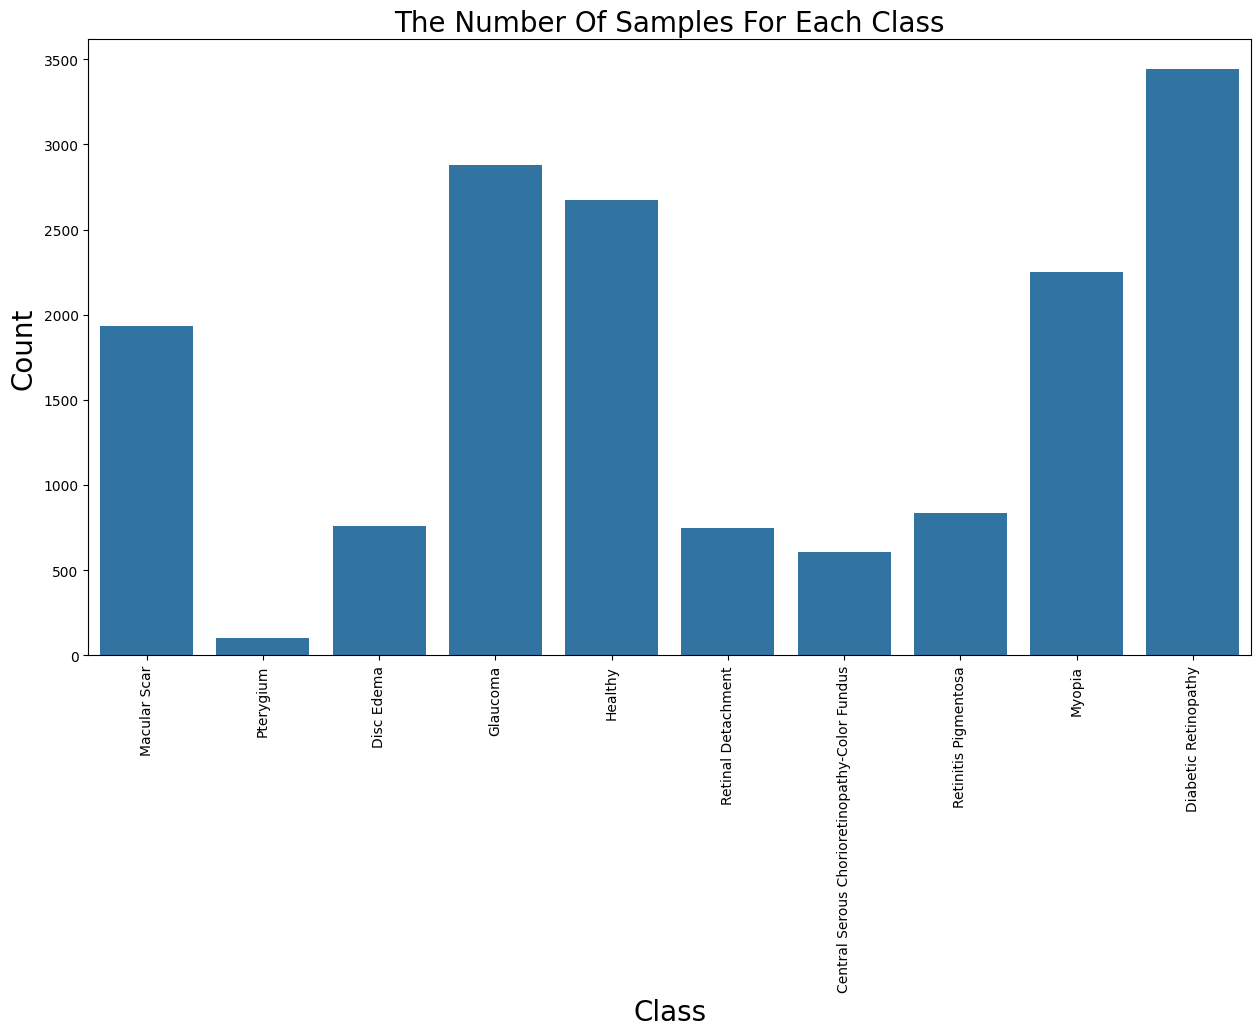

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))

ax = sns.countplot(x=df.label)
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.xticks(rotation=90)
plt.show()

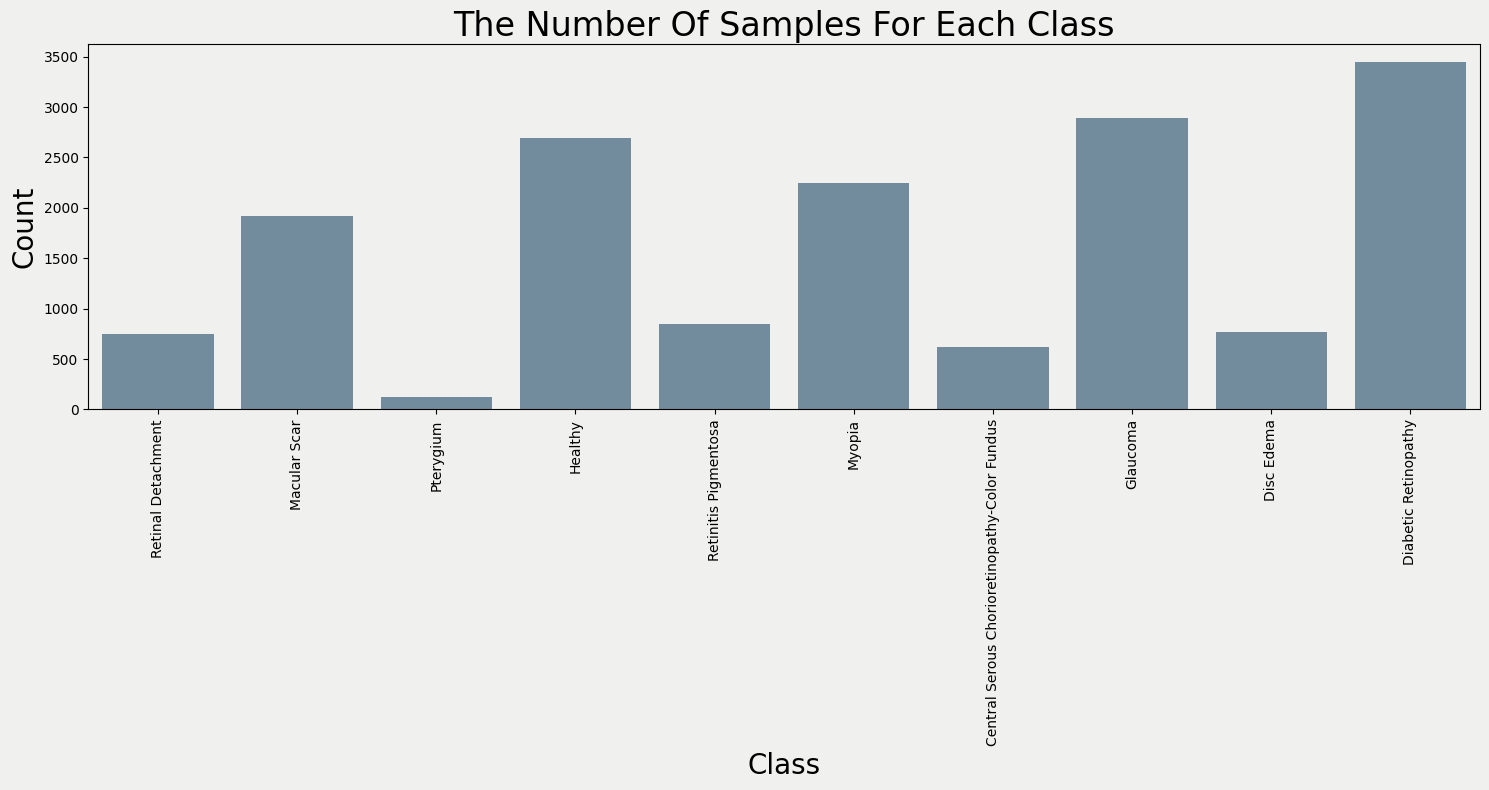

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
classes = ['Retinal Detachment', 'Macular Scar', 'Pterygium', 'Healthy', 'Retinitis Pigmentosa',
           'Myopia', 'Central Serous Chorioretinopathy-Color Fundus', 'Glaucoma', 'Disc Edema',
           'Diabetic Retinopathy']
counts = [750, 1920, 120, 2690, 850, 2250, 620, 2890, 770, 3450]

# Custom background color (soft light gray)
custom_bg_color = '#f0f1ef'
# Custom bar color (soft blue-gray)
bar_color = '#6c8ea4'

# Create the plot
plt.figure(figsize=(15, 8), facecolor=custom_bg_color)
ax = sns.barplot(x=classes, y=counts, color=bar_color)

# Set background color for plot area
ax.set_facecolor(custom_bg_color)

# Titles and labels
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=24)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


To fix this imbalance, we applied Random Oversampling.

This technique duplicates samples from minority classes to match the size of the majority classes.

Undersampling would remove useful images from big classes, which could hurt the model’s learning.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['image', 'label_enc']], df['label_enc'],
    test_size=0.2,
    random_state=42,
    stratify=df['label_enc']
)

# Apply oversampling to training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create new DataFrame for balanced training data
df_train_resampled = pd.DataFrame({
    'image': X_train_resampled['image'],
    'label_enc': y_train_resampled
})

This is just showing a graph in how we balanced our dataset with random oversampling

,count
label_enc,
1,2755
5,2755
6,2755
2,2755
9,2755
8,2755
3,2755
4,2755
7,2755


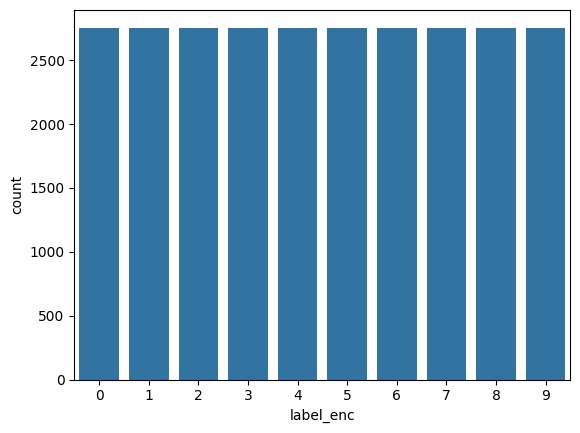

In [ ]:
# Create a dictionary that maps label_enc values to label strings
label_map = {i: label for i, label in enumerate(le.classes_)}

# Apply the mapping to the 'label_enc' column to create the 'label' column
df_train_resampled['label'] = df_train_resampled['label_enc'].map(label_map)


#use the label encoding
sns.countplot(x='label_enc', data=df_train_resampled)
#show the total count
df_train_resampled['label_enc'].value_counts()

We can now randomly select images *This is what I meant from before*


Understand visual patterns across different eye diseases

*Catch problems early before training the model

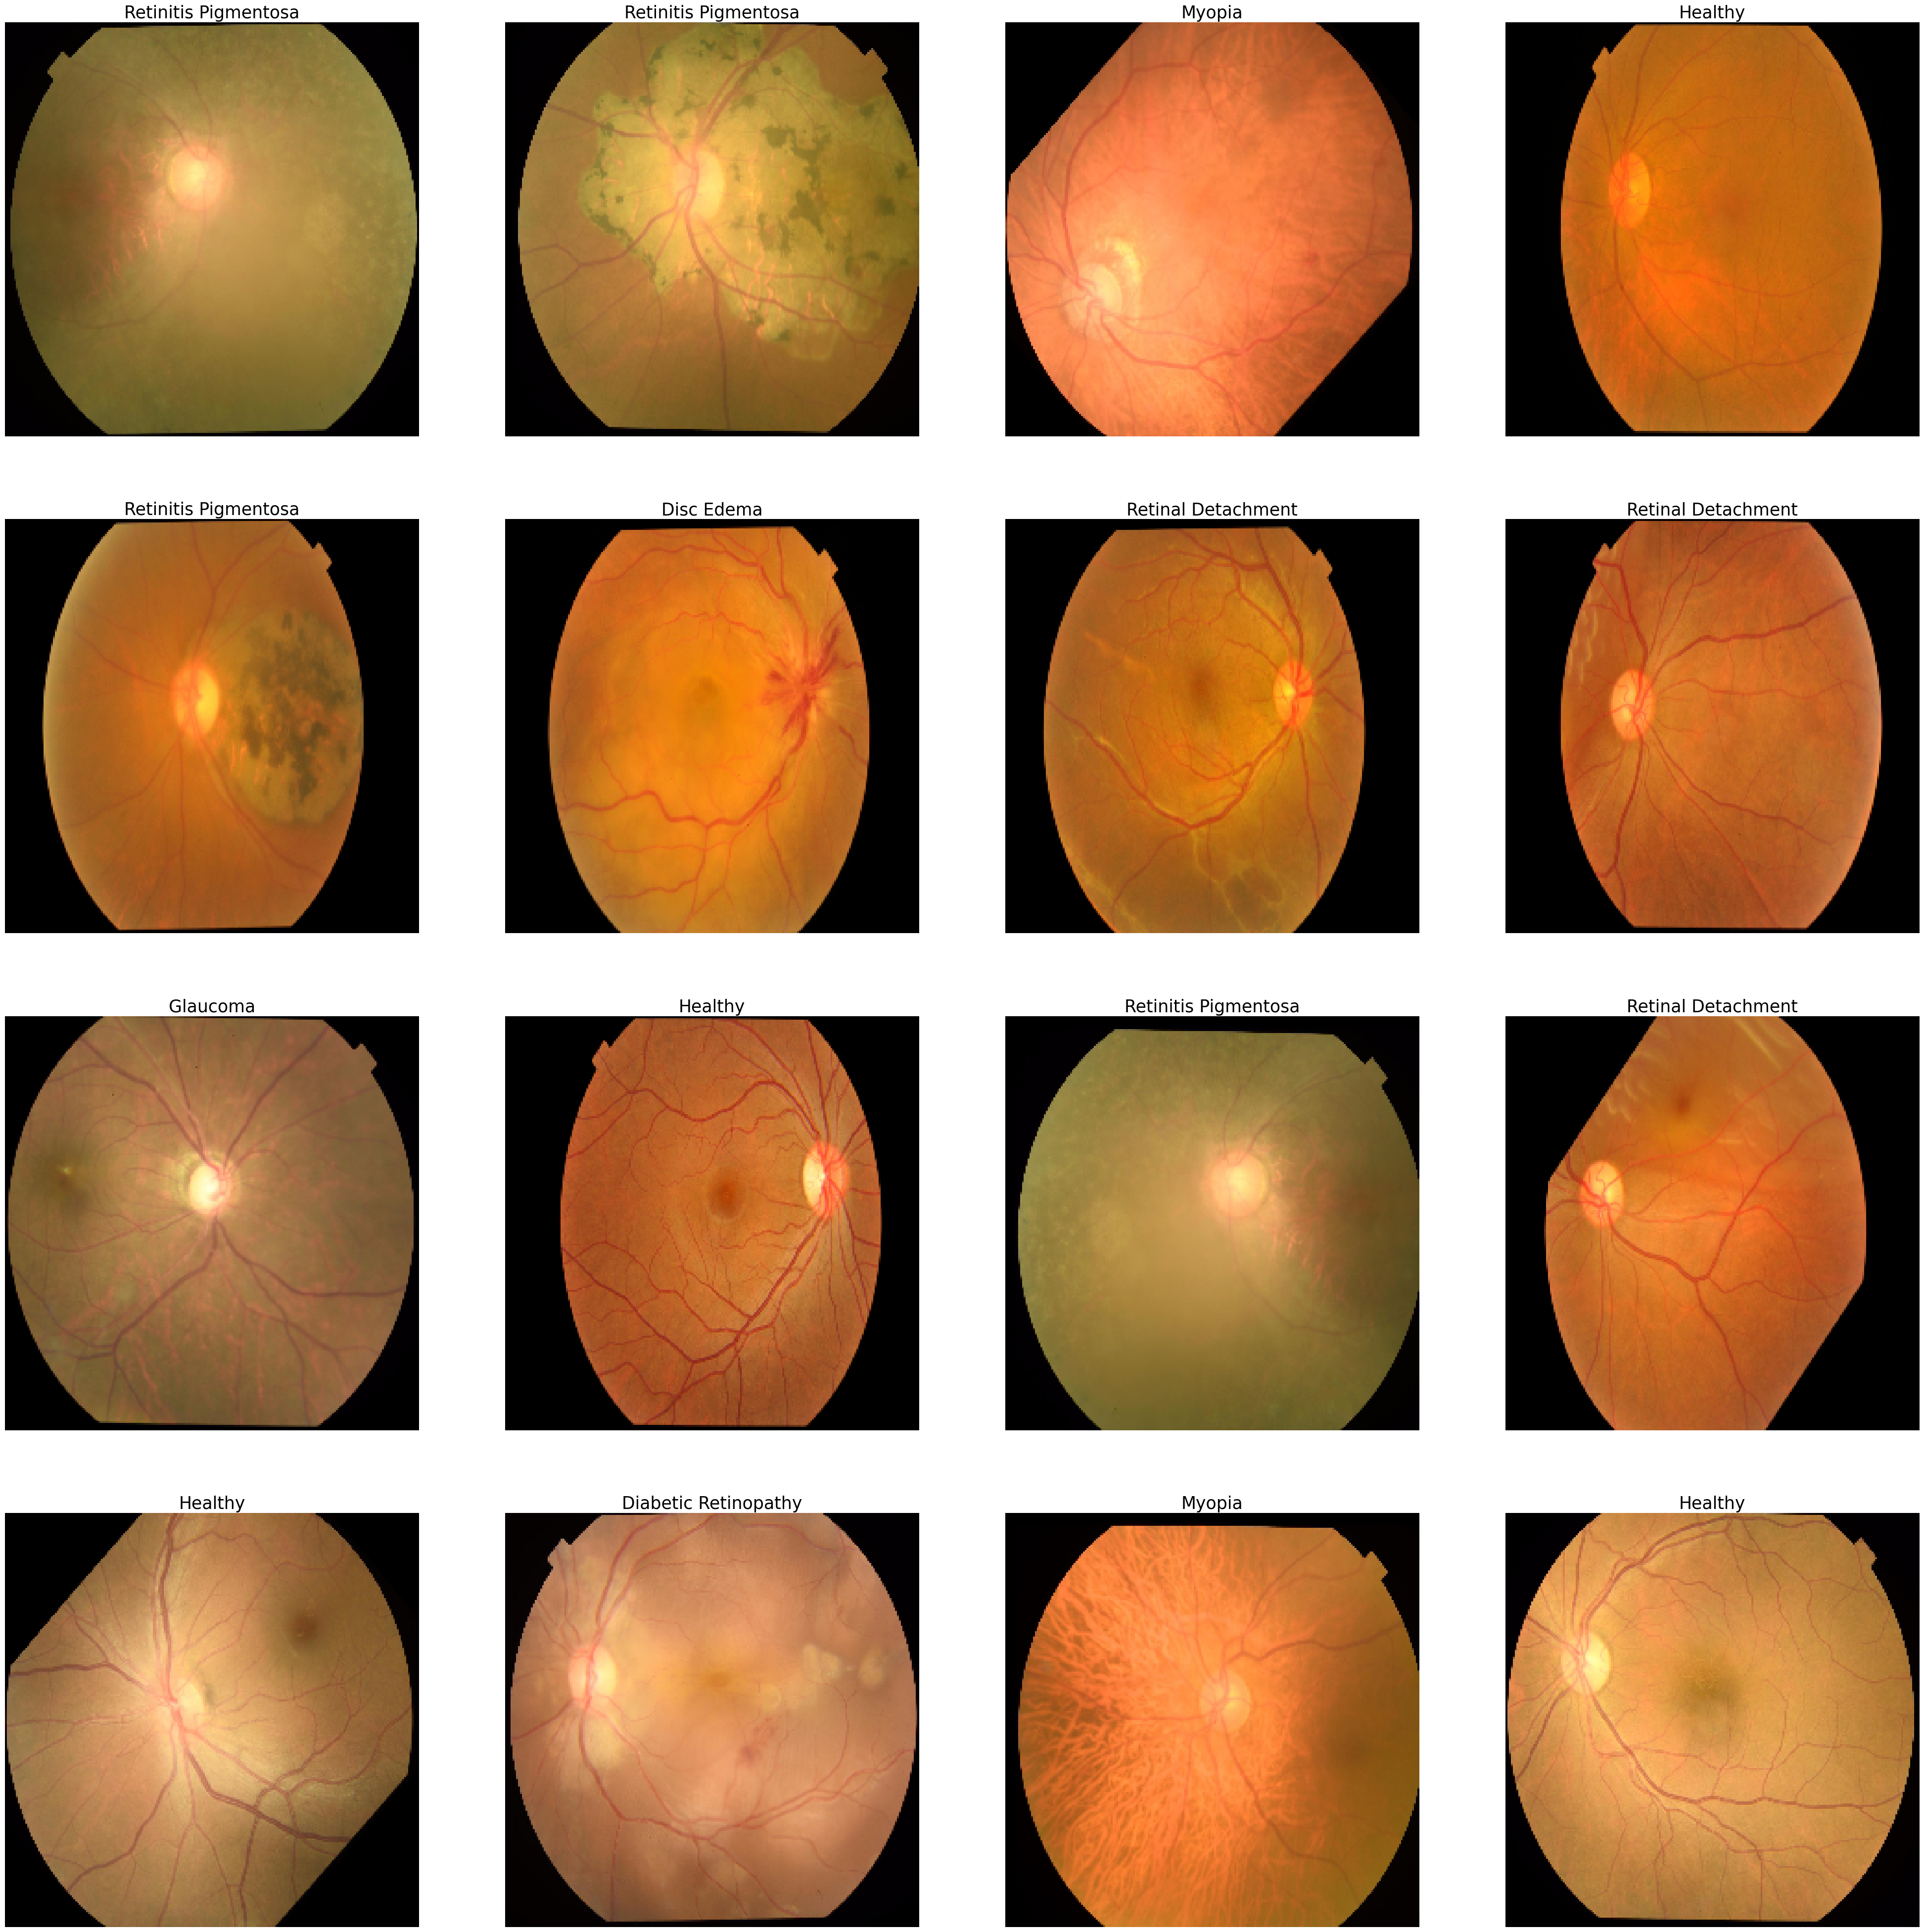

In [ ]:
import cv2
# Create a figure with a large size for displaying the images in a grid
plt.figure(figsize=(50,50))

for n, i in enumerate(np.random.randint(0, len(df), 16)):
    plt.subplot(4, 4, n+1)
    img = cv2.imread(df.image[i])
    # Resize the image to 224x224 pixels because we cant see
    img = cv2.resize(img, (224, 224))
    # Convert the image from BGR (OpenCV format) to RGB (for correct display with matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i], fontsize=25)

So what is our Feature Variable?
Well.. They are the images that are zoomed in

Features = Image pixels (shape: 128x128x3)

Target = Disease label (1 of 10 classes)

Step 3: Load the Data
Split the data into training, validation, and test sets

First, 80% goes to training
10% for validation, 10% for final testing

I also printed the shape columns for train, test, validation which I think we should add to the presentation. The 2 just represented the image and label column

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Start with your balanced training dataset
df_resampled = pd.DataFrame({
    'image': X_train_resampled['image'],
    'label': y_train_resampled
})

# Step 2: 80% train, 20% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_resampled['image'],
    df_resampled['label'],
    test_size=0.2,
    random_state=101,
    stratify=df_resampled['label']
)

# Step 3: Split temp into 10% val and 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=101,
    stratify=y_temp
)

# Step 4: Create final DataFrames
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_val   = pd.DataFrame({'image': X_val,   'label': y_val})
df_test  = pd.DataFrame({'image': X_test,  'label': y_test})


In [ ]:
print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)
print("Test shape:", df_test.shape)


Train shape: (22040, 2)
Validation shape: (2755, 2)
Test shape: (2755, 2)


This is where we do the step of Loading the data- I followed the same steps where shuffling helps except for the last part of test generator


 data loaders automatically resize, adjust, and enhance images, getting them ready for the model to learn from, saving us time and effort.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#
# Reduce target size and batch size
image_size = (128, 128)
batch_size = 16

# Re-initialize ImageDataGenerator
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rescale=1./255
)

# Ensure 'label' column in DataFrames contains strings
df_train['label'] = df_train['label'].astype(str)
df_val['label'] = df_val['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)

# Balanced training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,

    shuffle=True
)

# Validation generator
val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,

    shuffle=True
)

# Test generator
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,

    shuffle=False
)

Found 22040 validated image filenames belonging to 10 classes.
Found 2755 validated image filenames belonging to 10 classes.
Found 2755 validated image filenames belonging to 10 classes.



 training set has 22,040 images.


validation set and test set each have 2,755 images.

In [ ]:
#print value counts for balanced dataset
print("Training Set Class Distribution:")
print(df_train['label'].value_counts())

Training Set Class Distribution:
label
2    2204
9    2204
1    2204
0    2204
4    2204
5    2204
7    2204
3    2204
6    2204
8    2204
Name: count, dtype: int64


Hyperparameter Tuning:

 Reduce image size: Smaller inputs mean fewer computations (e.g., 128×128 instead of 224×224).

 Decrease batch size: Smaller batches fit in memory easier (e.g., 16 vs 32).

 Limit epochs: Fewer training rounds (e.g., 10 instead of 50).

Use early stopping: Stops training when validation loss stops improving

Input Layer

Accepts images of size 128 × 128 × 3 (RGB)

3 Convolutional Layers

Conv2D layers with filters: 32 → 64 → 128
We use 32 → 64 → 128 filters so the model can detect simple to complex patterns as it goes deeper
Memory efficiency: Hardware (like GPUs) handles powers of 2^n very efficiently

Activation: ReLU Non linear function


Purpose: Detect edges, patterns, and textures

MaxPooling2D after each Conv layer

Reduces feature map size

Helps retain only the most important features

Flatten Layer

Converts 2D feature maps to 1D

Dense Layer

128 neurons with ReLU activation


Output Layer

10 neurons (for 10 classes)

Activation: Softmax → gives probabilities for each class

1 layer = basic edges

2 layers = textures/shapes

3 layers = full patterns
making the model too deep, which could lead to overfitting or longer training time with minimal improvemen

In [ ]:
# Define a Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same')) #changed input shape to (128, 128, 3)
model.add(MaxPooling2D((2, 2), strides=2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu')) #Reduced number of units
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 classes

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,970 (16.36 MB)

 Trainable params: 4,288,970 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

More epochs = longer training time

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
checkpoint_cb = ModelCheckpoint(
    "model_cnn_fyp.keras",         # We Save the best model
    save_best_only=True
)

early_stopping_cb = EarlyStopping(
    patience=5,                   # Stop early if no validation improvement
    restore_best_weights=True
)

#  Compile your model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  Train the model using balanced training and validation sets
model.fit(
    train_generator,              # Balanced training generator (already uses df_train)
    epochs=10,                    # Reduced for faster training
    validation_data=val_generator,  # Balanced validation generator
    callbacks=[checkpoint_cb, early_stopping_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1189s 857ms/step - accuracy: 0.4073 - loss: 1.6417 - val_accuracy: 0.6642 - val_loss: 0.9555
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1215s 852ms/step - accuracy: 0.6405 - loss: 0.9906 - val_accuracy: 0.7608 - val_loss: 0.6680
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1152s 836ms/step - accuracy: 0.7210 - loss: 0.7661 - val_accuracy: 0.7913 - val_loss: 0.5832
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1156s 838ms/step - accuracy: 0.7723 - loss: 0.6264 - val_accuracy: 0.8283 - val_loss: 0.4735
Epoch 5/10
 886/1378 ━━━━━━━━━━━━━━━━━━━━ 6:23 780ms/step - accuracy: 0.8087 - loss: 0.5296

Slide Title: Training & Validation Performance Over Epochs
 Epoch Summary (0–9):

Training Accuracy increased from 49% → 90%

Training Loss dropped from 1.39 → 0.27

Validation Accuracy improved from 66% → 89%

Validation Loss decreased from 0.96 → 0.34

Accuracy: Shows how well the model is fitting the data it's learning from

Training loss: Measures how well the model is learning

Validation accuracy: Tells you how well your model generalizes % correct on unseen data

Lower val_loss = better generalization

In [ ]:
# Pull the training and validation metrics into a dataframe.
hist = pd.DataFrame(model.history.history)
hist

NameError: name 'model' is not defined


 Training Loss keeps going down → the model is learning from the training images.

Validation Loss also goes down → the model is learning in a way that works on new, unseen images.

 No big gap between training and validation loss - no overfitting (model is not memorizing, it’s generalizing well


Right Graph: Train Accuracy & Validation Accuracy
Accuracy means how many predictions the model got right. Higher is better.

Training Accuracy goes up → the model is getting better at recognizing patterns in training data.

 Validation Accuracy goes up with it → the model is also doing well on validation data (new, unseen examples).

 Validation accuracy is slightly higher than training accuracy for most epochs → great sign of generalization.

NameError: name 'hist' is not defined

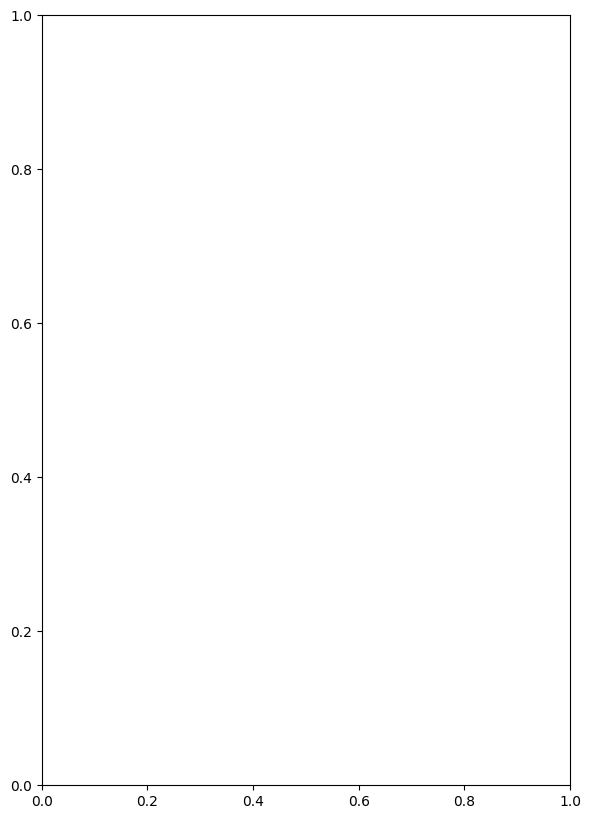

In [ ]:
# Plot the training and validation metrics

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(hist['loss'], label='Train_Loss')
plt.plot(hist['val_loss'], label='Validation_Loss')
# Set the title for the plot
plt.title('Train_Loss & Validation_Loss', fontsize=20)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist['accuracy'], label='Train_Accuracy')
plt.plot(hist['val_accuracy'], label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test dataset using the test generator, getting the loss and accuracy
test_loss, acc = model.evaluate(test_generator)

print('Test Loss: ', test_loss)
print('Test Accuracy: ', acc)

It lets you compare what the model predicted with the true answer.

In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

Helps people trust the model
When you show correct predictions with the real images, it proves the model works.

In [ ]:
plt.figure(figsize=(30,90))
batch = next(test_generator)
images= batch[0]
for n in range(24):
    plt.subplot(24,4,n+1)
    img = cv2.imread(df.image[n])
    # Resize the image to 224x224 pixels (standard input size for many models)
    img = cv2.resize(img, (224, 224))
    # Convert the image from BGR (OpenCV format) to RGB (for correct display with matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"\n Actual: {class_num[y_test[n]]}, \n Predicted: {class_num[y_pred[n]]}.",fontsize=18)

 Classification Report – Key Metrics
Precision: How many predicted cases were correct

Recall: How many actual cases the model caught

F1-Score: Balance between precision and recall

Support: Total true examples per class



 Classes to Improve
Glaucoma:

Often confused with Healthy & Macular Scar

as seen in our confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

CM = confusion_matrix(y_test, y_pred)

CM = sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', center=True, cbar=False, annot=True,
                 cmap='crest',
            xticklabels=class_num, yticklabels=class_num)



ClassificationReport = classification_report(y_test, y_pred, target_names=class_num)

print('Classification Report : \n ', ClassificationReport)

CM